In [6]:
import pandas as pd

In [7]:
"""1. Load data using Pandas library, set no header and replace dots 
with NaN, set column names as in the small file.

    See pandas.read_csv() online for details

    You can look at your data using <mydataset>.head()"""

df = pd.read_csv('~/Downloads/tao-all2.txt', delim_whitespace=True, names = ["obs","year","month","day","date","latitude","longitude","zon.winds","mer.winds","humidity","air temp.","s.stemp."])

In [8]:
import numpy as np
df2 = df.replace('.', np.nan)

In [9]:
del df2['obs']

In [10]:
del df2['date']

In [11]:
len(df2)

178080

In [12]:
df3 = df2.dropna(how='any')
#df2 = df.dropna(subset=["year","month","day","latitude","longitude","zon.winds","mer.winds","humidity","air temp.","s.stemp."])
len(df3)

93935

In [13]:
df3.to_csv('temp.csv')

In [14]:
df4 = pd.read_csv('temp.csv')

In [15]:
# make year, month and day as strings i.e. categorical features
df4['year'].apply(str)
df4['month'].apply(str)
df4['day'].apply(str)

0         9
1        10
2        11
3        12
4        13
5        14
6        15
7        16
8        17
9        18
10       19
11       20
12       21
13       22
14       23
15       24
16       25
17       26
18       27
19       28
20       29
21       30
22       31
23        1
24        2
25        3
26        4
27        5
28        6
29        7
         ..
93905    16
93906    17
93907    18
93908    19
93909    20
93910    21
93911    22
93912    23
93913    24
93914    25
93915    26
93916    27
93917    28
93918    29
93919    30
93920    31
93921     1
93922     2
93923     3
93924     4
93925     5
93926     6
93927     7
93928     8
93929     9
93930    10
93931    11
93932    12
93933    13
93934    14
Name: day, dtype: object

In [16]:
y = df4['s.stemp.']

In [17]:
X = df4[['year', 'month','day','latitude','longitude','zon.winds','mer.winds','humidity']]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [24]:
from sklearn.linear_model import Ridge

# build model
ridge = Ridge(alpha=2).fit(X_train, y_train)

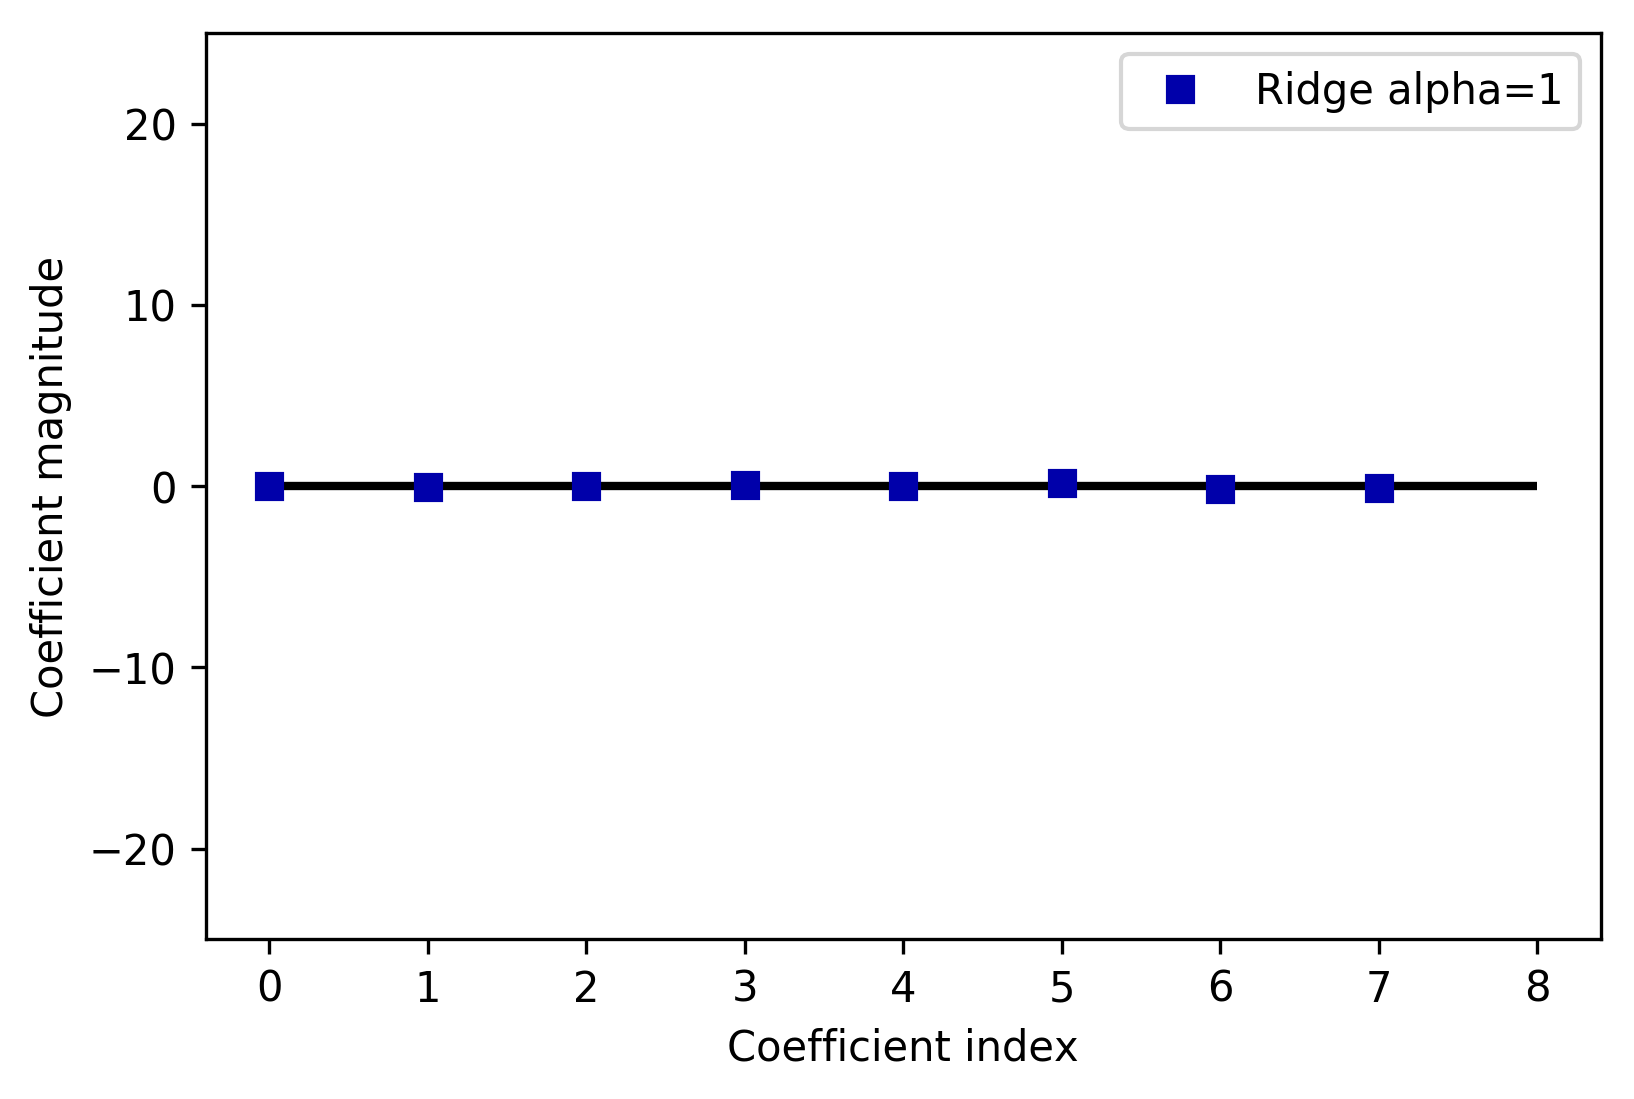

In [25]:
%matplotlib inline
from preamble import *
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(ridge.coef_))
plt.ylim(-25,25)
plt.legend()

In [37]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=ridge, n_features_to_select=1, step=1)
rfe.fit(X,y)
ranking = rfe.ranking_.reshape(8)
#ranking = rfe.ranking_.reshape(digits.images[0].shape)
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'reshape'

1. Load data using Pandas library, set no header and replace dots 
with NaN, set column names as in the small file.

    See pandas.read_csv() online for details

    You can look at your data using <mydataset>.head()


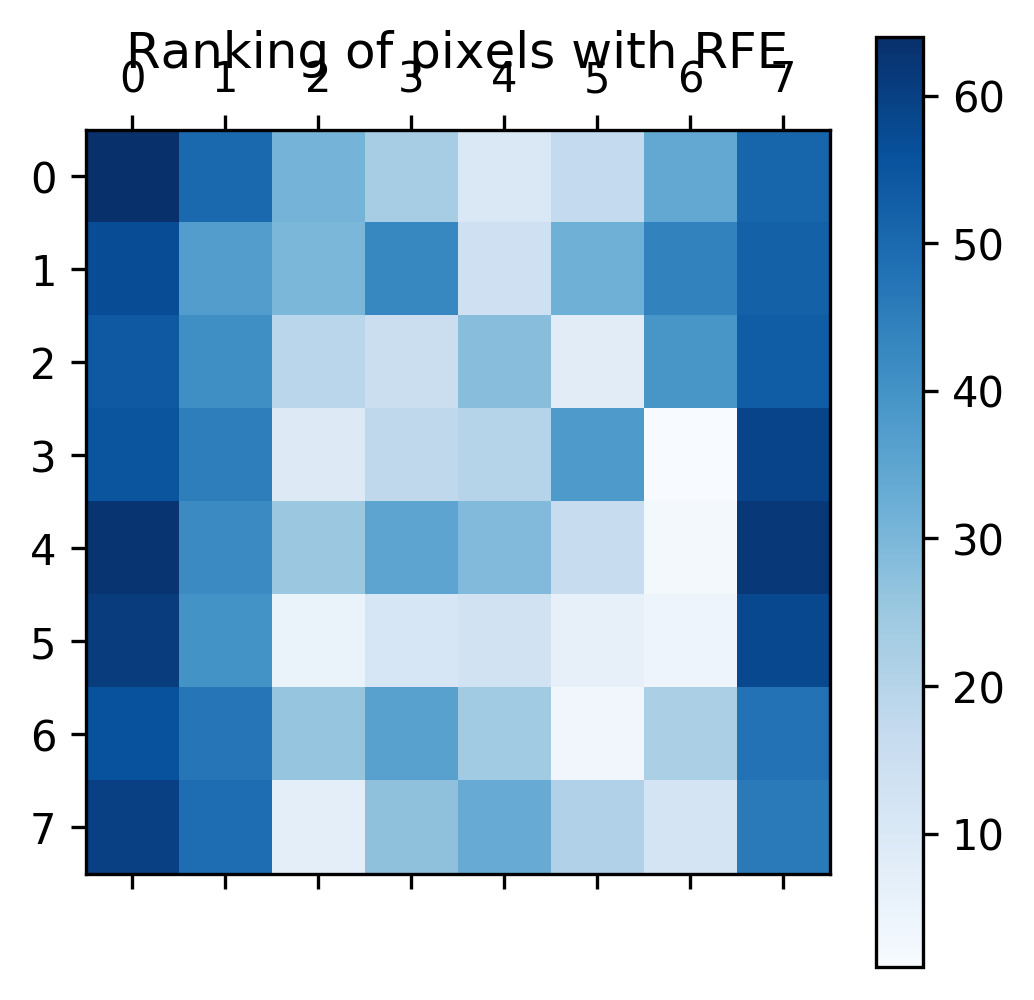

In [38]:
print(__doc__)

from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

In [42]:
digits.images[0].shape

(8, 8)